# Обучение модели с помощью sklearn

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Пример 1

Пусть нам заданы 1000 точек — это матрица **X**, и есть целевая функция **Y**.

In [ ]:
np.random.seed(0) # для воспроизведения результатов
x = np.random.rand(1000, 1)
y = 1 + 3 * x + np.random.randn(1000, 1)

d = {'x': x.reshape(1,1000)[0], 'y': y.reshape(1,1000)[0]}
df = pd.DataFrame(data=d)
df.head()

,x,y
0,0.548814,2.544743
1,0.715189,3.164847
2,0.602763,4.657881
3,0.544883,2.420483
4,0.423655,1.771948


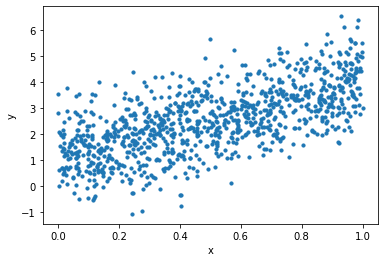

In [ ]:
plt.scatter(df['x'], df['y'], s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Мы хотим найти зависимость с помощью линейной регресии.

Разделим исходные данные на обучающую и тестовую выборки в соотношении 70% и 30%.

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, train_size=0.7, random_state=123) # random_state нужен для воспроизводимости результата

Для построения самой модели импортируем класс `LinearRegression` из `sklearn.linear_model`.

In [ ]:
from sklearn.linear_model import LinearRegression

Теперь у нас есть всё необходимое для построения модели.

Создадим экземпляр класса `LinearRegression`, который будет содержать в себе модель регрессии.

In [ ]:
model = LinearRegression()

Чтобы обучить модель, необходимо вызвать метод `.fit()` на объект `model`. В качестве аргументов здесь передаются матрица **X** и целевая функция **Y**. Обучать модель будем на обучающей выборке.

In [ ]:
model.fit(train[['x']], train[['y']])

LinearRegression()

Поздравляем, модель готова!

Можно сделать всё проще, в одну строчку. Эта операция делает то же самое.

```
model = LinearRegression().fit(train[['x']], train[['y']])
```



У полученного объекта `model` есть атрибуты: 
`.intercept_` — представляет собой коэффициент w0,
`.coef_` — представляют собой w1, ..., wk.

In [ ]:
print('w_0:', model.intercept_)
print('w_1:', model.coef_)

w_0: [1.08258227]
w_1: [[2.84716323]]


Полученная модель имеет вид `y* = 1.08 + 2.85*x1`

Напомним, что исходная модель — `y = 1 + 3 * x + np.random.randn(1000, 1)`

Теперь можно использовать модель для прогноза значений. Для этого будем использовать метод `.predict()`. В качестве аргументов для данного метода требуется матрица **X**.

In [ ]:
y_predict_train = model.predict(train[['x']])
print(y_predict_train[:, 0][:10])

[1.78985595 1.45860173 2.99601208 2.15810342 3.66369375 1.16785573
 1.80559558 1.45979619 1.11593418 2.08447907]


Проверим этот расчёт по найденной формуле.

In [ ]:
y_predict_train = model.intercept_ + model.coef_ * train[['x']]
print(y_predict_train[:10])

            x
498  1.789856
243  1.458602
314  2.996012
202  2.158103
300  3.663694
682  1.167856
230  1.805596
306  1.459796
166  1.115934
620  2.084479


Посмотрим на графике, какую модель получили.

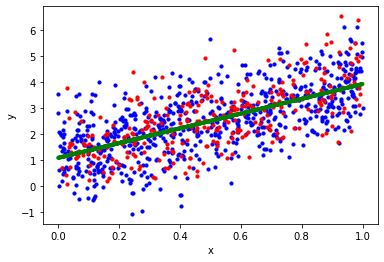

In [ ]:
plt.plot(train['x'], y_predict_train, linewidth=4, c='g')
plt.scatter(train['x'], train['y'], s=10, c='b')
plt.scatter(test['x'], test['y'], s=10, c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Чтобы получить результаты модели по тестовой выборке, выполним следующее:

In [ ]:
y_predict_test = model.predict(test[['x']])

Оценим качество модели с помощью MSE.

In [ ]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(train[['y']], y_predict_train)
test_mse = mean_squared_error(test[['y']], y_predict_test)
print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 0.9599829425512107
Test MSE: 0.8715242272540316


Оценим также качество модели с помощью MAE.

In [ ]:
from sklearn.metrics import mean_absolute_error

train_mae = mean_absolute_error(train[['y']], y_predict_train)
test_mae = mean_absolute_error(test[['y']], y_predict_test)
print("Train MAE: {}".format(train_mae))
print("Test MAE: {}".format(test_mae))

Train MAE: 0.7845720071057997
Test MAE: 0.7261670560834567


Именно эти метрики чаще всего используются в задаче регрессии. Остановимся на них подробнее.

Для примера посмотрим на задачу прогноза цены на автомобиль. Допустим, у нас нет ни одного параметра об автомобилях, есть только сами значения целевой функции. То есть прогнозировать будем модель следующего вида: `y* = w_0`. По факту это означает, что будем прогнозировать для всех объектов одно число — константу.

Возникает вопрос, какое число нужно выбрать, если мы будем использовать оценку ошибки MAE? А если будем использовать ошибку MSE?

Итак, наилучшее качество такой модели при использовании метрики MAE будет достигаться при медиане `w_0 = median(y)`.

А при использовании метрики MSE наилучшее качество такой модели будет достигаться при среднем значении `w_0 = mean(y)`.

Таким образом, можно отметить, что в метрике MAE по сравнению с MSE существенно меньший вклад в ошибку будут вносить примеры, сильно удалённые от ответов модели. Так как используется модуль расстояния, а не квадрат.

И функция потерь MAE уместна в случаях, когда в данных большое количество выбросов в целевой функции.

Перейдём к следующему примеру.

## Пример 2

Пусть нам также заданы 1000 точек — это матрица **X**, и есть целевая функция **Y**. Однако теперь сама по себе искомая зависимость нелинейная.

In [ ]:
np.random.seed(0) # для воспроизведения результатов
x = np.random.rand(1000, 1)
y = 1 + 3 * np.log(x) + np.random.randn(1000, 1)

d = {'x': x.reshape(1,1000)[0], 'y': y.reshape(1,1000)[0]}
df = pd.DataFrame(data=d)
df.head()

,x,y
0,0.548814,-0.901687
1,0.715189,0.013656
2,0.602763,1.330900
3,0.544883,-1.035718
4,0.423655,-2.075526


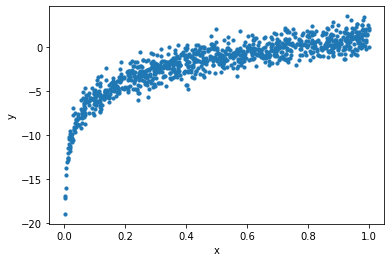

In [ ]:
plt.scatter(df['x'], df['y'], s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Построим модель линейной регресии, используя уже известные нам команды.

In [ ]:
train, test = train_test_split(df, train_size=0.7, random_state=123) # random_state нужен для воспроизводимости результата

In [ ]:
model = LinearRegression()
model.fit(train[['x']], train[['y']])

LinearRegression()

In [ ]:
y_predict_train = model.predict(train[['x']])
y_predict_test = model.predict(test[['x']])

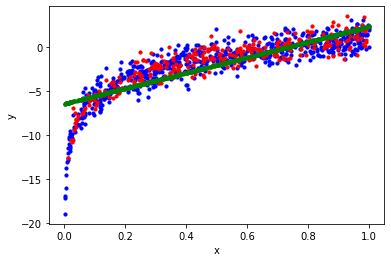

In [ ]:
plt.scatter(train['x'], train['y'], s=10, c='b')
plt.scatter(test['x'], test['y'], s=10, c='r')
plt.scatter(train['x'], y_predict_train, s=10, c='g')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Очевидно, получилось не самое лучшее решение. Посмотрим на качество модели.

In [ ]:
train_mse = mean_squared_error(train[['y']], y_predict_train)
test_mse = mean_squared_error(test[['y']], y_predict_test)
print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 3.137684915760023
Test MSE: 1.9666504105743103


In [ ]:
from sklearn.metrics import mean_absolute_error

train_mae = mean_absolute_error(train[['y']], y_predict_train)
test_mae = mean_absolute_error(test[['y']], y_predict_test)
print("Train MAE: {}".format(train_mae))
print("Test MAE: {}".format(test_mae))

Train MAE: 1.2394688443948811
Test MAE: 1.0749333352063293


Как вы знаете, задача машинного обучения — найти наиболее оптимальную модель. Попробуем улучшить модель, добавив переменную логарифм от переменной `x`.

In [ ]:
df['x2'] = df['x'].apply(lambda x: np.log(x))

In [ ]:
train, test = train_test_split(df, train_size=0.7, random_state=123) # random_state нужен для воспроизводимости результата

Обратите внимание, здесь и далее будем использовать уже две переменных: `x` и `x2`.

In [ ]:
model = LinearRegression()
model.fit(train[['x', 'x2']], train[['y']])

LinearRegression()

In [ ]:
y_predict_train = model.predict(train[['x', 'x2']])
y_predict_test = model.predict(test[['x', 'x2']])

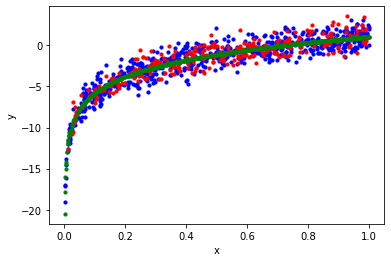

In [ ]:
plt.scatter(train['x'], train['y'], s=10, c='b')
plt.scatter(test['x'], test['y'], s=10, c='r')
plt.scatter(train['x'], y_predict_train, s=10, c='g')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

График уже выглядит лучше. Оценим качество.

In [ ]:
train_mse = mean_squared_error(train[['y']], y_predict_train)
test_mse = mean_squared_error(test[['y']], y_predict_test)
print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 0.9500342328699919
Test MSE: 0.8666177085273008


In [ ]:
from sklearn.metrics import mean_absolute_error

train_mae = mean_absolute_error(train[['y']], y_predict_train)
test_mae = mean_absolute_error(test[['y']], y_predict_test)
print("Train MAE: {}".format(train_mae))
print("Test MAE: {}".format(test_mae))

Train MAE: 0.7802681943269093
Test MAE: 0.7283304269248566


Действительно, добавление переменной логарифма от `x` позволило улучшить качество модели, то есть снизить ошибку.